In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# filetype = 'submission'
filetype = 'comment'

In [3]:
crypto = 'crypto_bitcoin'
# crypto = 'crypto_ethereum'
# crypto = 'crypto_xrp'

In [4]:
list_subs = ['bitcoin','bitcoinbeginners','bitcoinmarkets','bitcoinmining','btc']
subreddit = 'bitcoin'
# list_subs = ['ethereum','ethermining','ethfinance','eth','ethtrader']
# subreddit = 'ethereum'
# list_subs = ['xrp','ripple']
# subreddit = 'ripple'

In [5]:
sentiment_counts = pd.DataFrame(columns=['Subreddit','Positive','Neutral','Negative'])
sentiment_counts

,Subreddit,Positive,Neutral,Negative


In [6]:
colors = {'Negative': '#A675A1', 'Neutral': '#DCCDE8', 'Positive': '#8F3985'}

/var/folders/2l/h6ht9_t96fn33pfzbxcdp_dm0000gn/T/ipykernel_57079/734035470.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)


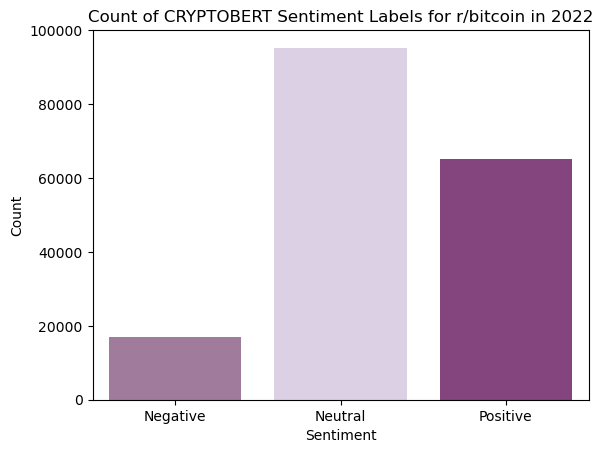

/var/folders/2l/h6ht9_t96fn33pfzbxcdp_dm0000gn/T/ipykernel_57079/734035470.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)


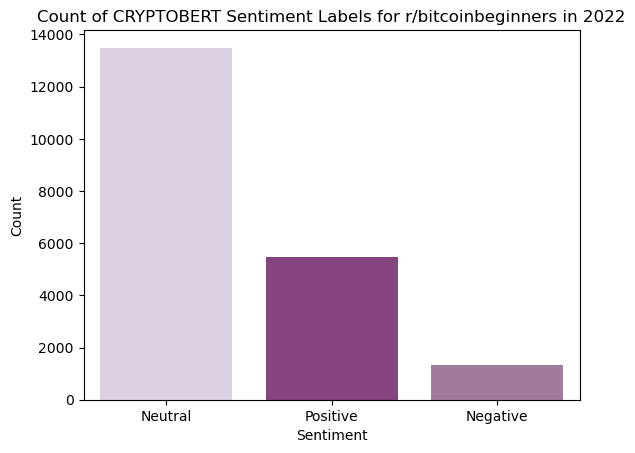

/var/folders/2l/h6ht9_t96fn33pfzbxcdp_dm0000gn/T/ipykernel_57079/734035470.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)


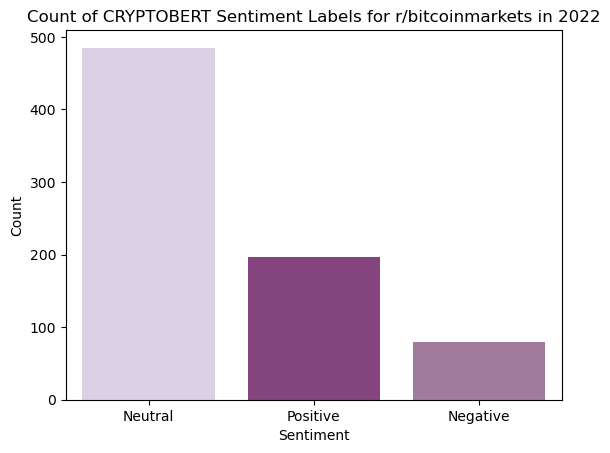

/var/folders/2l/h6ht9_t96fn33pfzbxcdp_dm0000gn/T/ipykernel_57079/734035470.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)


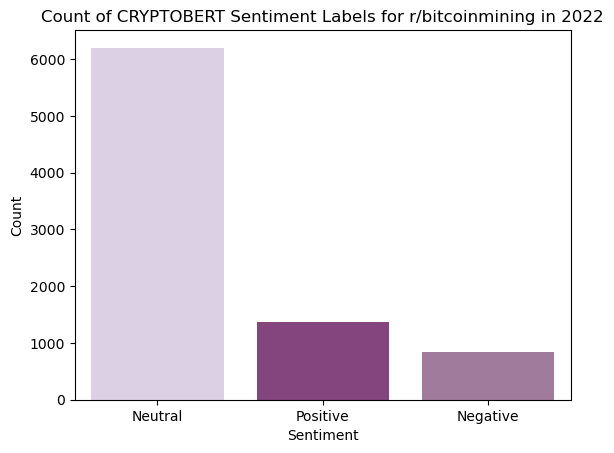

/var/folders/2l/h6ht9_t96fn33pfzbxcdp_dm0000gn/T/ipykernel_57079/734035470.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)


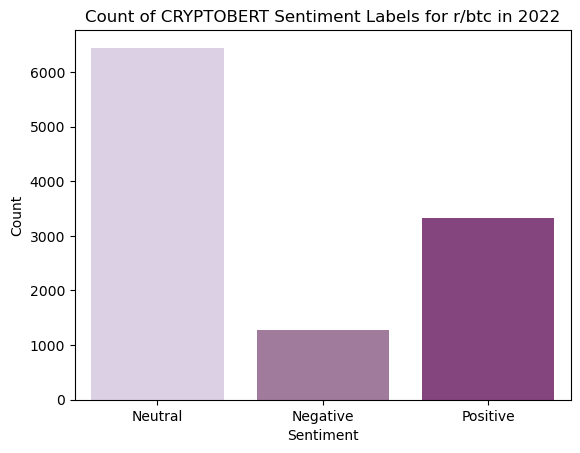

In [7]:
for subreddit in list_subs: 
    df = pd.read_csv(f"Data/Sentiment/{crypto}/CRYPTOBERT/{subreddit}_{filetype}_sentiment.csv")
    try: 
        pos_count = df['label'].value_counts()['Positive']
    except:
        pos_count = 0
    try: 
        neg_count = df['label'].value_counts()['Negative']
    except:
        neg_count = 0
    try: 
        neu_count = df['label'].value_counts()['Neutral']
    except:
        neu_count = 0
    sentiment_counts=sentiment_counts.append({'Subreddit':subreddit,'Positive':pos_count,'Negative':neg_count,'Neutral':neu_count},ignore_index=True)
    sns.countplot(data=df, x='label',palette=colors)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title(f'Count of CRYPTOBERT Sentiment Labels for r/{subreddit} in 2022')
    plt.savefig(f"Data/Sentiment/{crypto}/CRYPTOBERT/plots/{subreddit}_{filetype}_cryptobert_sentiment.png")
    plt.show()

In [8]:
sentiment_counts

,Subreddit,Positive,Neutral,Negative
0,bitcoin,65150,95240,17043
1,bitcoinbeginners,5487,13493,1344
2,bitcoinmarkets,196,485,79
3,bitcoinmining,1370,6200,838
4,btc,3318,6443,1272


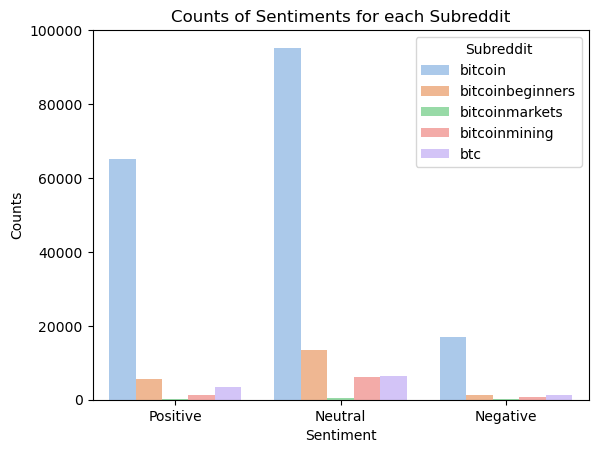

In [9]:
df_melted = sentiment_counts.melt(id_vars='Subreddit', var_name='Sentiment', value_name='Counts')

# Define colors for each subreddit
colors = sns.color_palette("pastel", n_colors=len(df))

# Create the bar plot
sns.barplot(data=df_melted, x='Sentiment', y='Counts', hue='Subreddit', palette=colors)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Counts of Sentiments for each Subreddit')

# Show the legend
plt.legend(title='Subreddit')
plt.savefig(f"Data/Sentiment/{crypto}/CRYPTOBERT/plots/cryptobert_sentiment_{filetype}.png")
# Show the plot
plt.show()